In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit as curve_fit
from scipy.stats import norm
import random

In [75]:
def gaussian(x,params):
    amp = params[0]
    mean = params[1]
    sig = params[2]
    return(amp/(np.sqrt(2*np.pi)*sig)*np.exp(-((x-mean)**2/(2*sig**2))))

In [67]:
def integrate_function(function,function_params,low_lim,high_lim,dx):
    total = 0
    x_steps = np.arange(low_lim,high_lim+dx,dx)
    for n in range(len(x_steps)-1):
        y1 = function(x_steps[n],function_params)
        y2 = function(x_steps[n+1],function_params)
        y_avg = (y1+y2)/2
        area = y_avg*dx
        total = total + area
    return(total)

In [25]:
def generate_y_uniform(N,ymax,ycut):
    y = np.random.rand(N)
    y = y * ymax
    mask = y>ycut
    yobs = y[mask]
    ymis = y[~mask]
    I = mask
    return(y,yobs,ymis,I)

In [71]:
def pdf_uniform(x,params):
    xmax = params[0]
    height = 1/xmax
    mask = x<xmax
    y = np.zeros(len(x))
    y[mask] = height
    return(y)

In [39]:
def selection_uniform(y,params):
    ycut = params[0]
    mask = y>ycut
    return(mask)

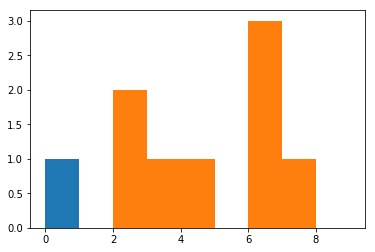

In [57]:
N = 10
ymax = 10
ycut = 1
y,yobs,ymis,I = generate_y_uniform(N,ymax,ycut)

bins = np.arange(0,ymax,1)
plt.hist(y,bins=bins)
plt.hist(yobs,bins=bins)
plt.show()

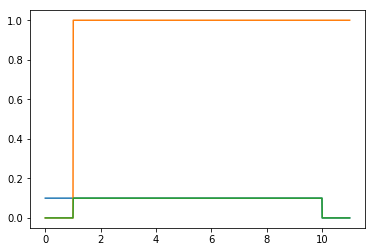

In [74]:
x = np.arange(0,11,0.01)
y1 = pdf_uniform(x,[10])
plt.plot(x,y1)

y2 = selection_uniform(x,[1])
plt.plot(x,y2)

y = y1*y2
plt.plot(x,y)
plt.show()

In [76]:
def double_gaussian(x,params):
    mean1 = params[0]
    sig1 = params[1]
    mean2 = params[2]
    sig2 = params[3]
    
    gaus1 = gaussian(x,[1,mean1,sig1])
    gaus2 = gaussian(x,[1,mean2,sig2])
    return(gaus1 + gaus2)

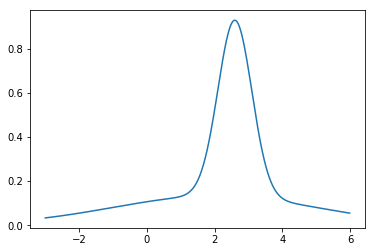

In [78]:
x = np.arange(-3,6,0.01)
y = double_gaussian(x,[2.6,0.5,2,3])
plt.plot(x,y)

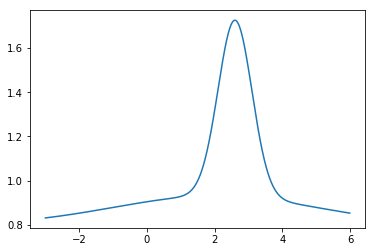

In [80]:
noise = gaussian(np.zeros(len(x)),[1,0,0.5])
plt.plot(x,y+noise)

In [81]:
noise

array([ 0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79788456,
        0.79788456,  0.79788456,  0.79788456,  0.79788456,  0.79